In [7]:
from BaconShor import BaconShorCirc, QuantumCircuit
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit_aer import AerSimulator


from qiskit_aer.noise import (
    NoiseModel,
    thermal_relaxation_error,
)

# Bacon-Shor and Time Relaxation Error 

The objective of this notebook is to show an interesting behavior of Bacon-Shor encoding. Time-relaxation errors cause qubits to go to the zero state. Bacon-Shor encoding doesn't show a favorite state bias behavior. To intuitively understand why this happens, you need to look into Bacon-Shor's commuting errors structure. 

What I want to show here is an intrinsic property that protects against state bias without error correction cycles. The way logical qubits are encoded can be used to mitigate some errors.

# Noise Model

I add time-relaxation error using a simple trick. Qiskit has a placeholder gate `delay`. We can use it to apply time error. I set each `delay` to be equivalent to `1 micro s` for `T1 = 90 micro s` and `T2 = 60 micro s`. Note that I apply this error on all qubits, including parity qubits.

In [6]:
noise_model = NoiseModel()
T1 = 90 # micro
T2 = 60  # micro
micro_s = 1 # micro
idle_error = thermal_relaxation_error(T1, T2, micro_s)
noise_model.add_all_qubit_quantum_error(idle_error, "delay")

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['delay']
  All-qubits errors: ['delay']


# |++> qubit `30 micro s` Test

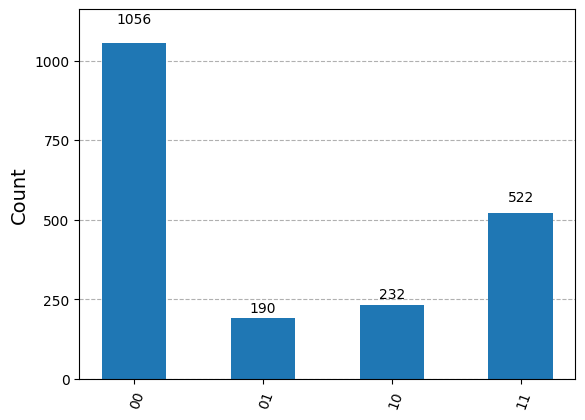

In [23]:
qubit_case = QuantumCircuit(2)
qubit_case.h(0)
qubit_case.cx(0,1)
for i in range(30):
    qubit_case.delay(1)
qubit_case.measure_all()
counts = AerSimulator(noise_model=noise_model, shots=2000).run(qubit_case).result().get_counts()
plot_histogram(counts)


# |++> Bacon-Shor `30 micro s` Test

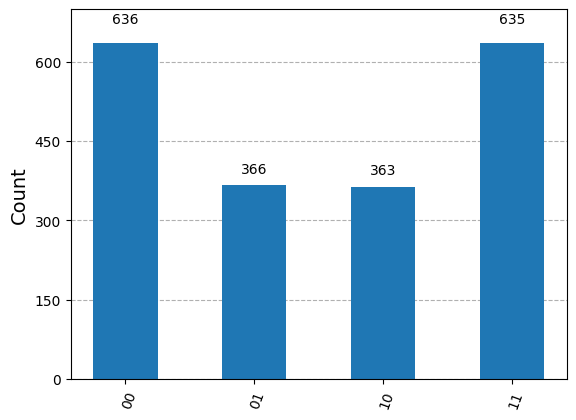

In [24]:
number_logicals = 2
logical_dim = (3,3)
BS = BaconShorCirc(number_logicals, logical_dim)
BS.initialize_logical(0, "+")
BS.initialize_logical(1, "0")
BS.CX(0, 1)
for i in range(30):
    BS.qc.delay(1)
BS.measure_logical(0)
BS.measure_logical(1)

raw_cts, filt_cts, plot = BS.run_with_plot(noise_model)
plot


### Conclusion

We don't get the correct state more often, but we get a better balanced distribution for sure.